## Sub-task 1: Unsupervised Learning

In [7]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [9]:
# File path
file_path = r"dataset\cluster1.csv"

# Read the data from the CSV file
df = pd.read_csv(file_path, header=None, names=['x', 'y'])

# Check the number of data points in the data set
print("Number of data points in the data set: ", len(df))

Number of data points in the data set:  600


In [10]:
df.head()

,x,y
0,-1.99360,-1.4564
1,0.91893,-1.3925
2,1.44620,-3.1794
3,0.39093,-1.5674
4,2.69920,-5.1001


In [12]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])
df

,x,y,cluster
0,-1.993600,-1.4564,1
1,0.918930,-1.3925,1
2,1.446200,-3.1794,2
3,0.390930,-1.5674,1
4,2.699200,-5.1001,2
...,...,...,...
595,-0.935660,-1.3848,1
596,2.701200,-3.7438,2
597,-0.852540,-1.5795,1
598,0.044536,-1.6157,1


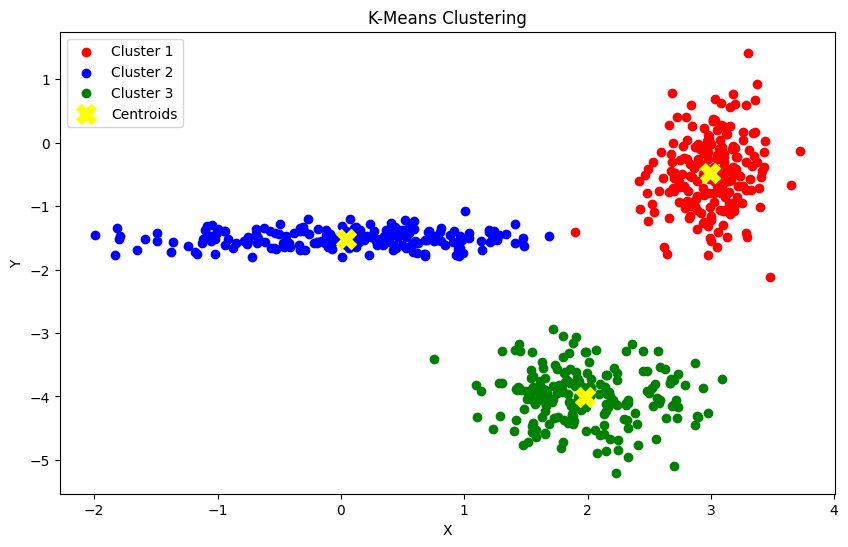

In [13]:
# Plot the resulting clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for cluster in range(3):
    clustered_data = df[df['cluster'] == cluster]
    plt.scatter(clustered_data['x'], clustered_data['y'], c=colors[cluster], label=f'Cluster {cluster + 1}')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', marker='X', s=200, label='Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

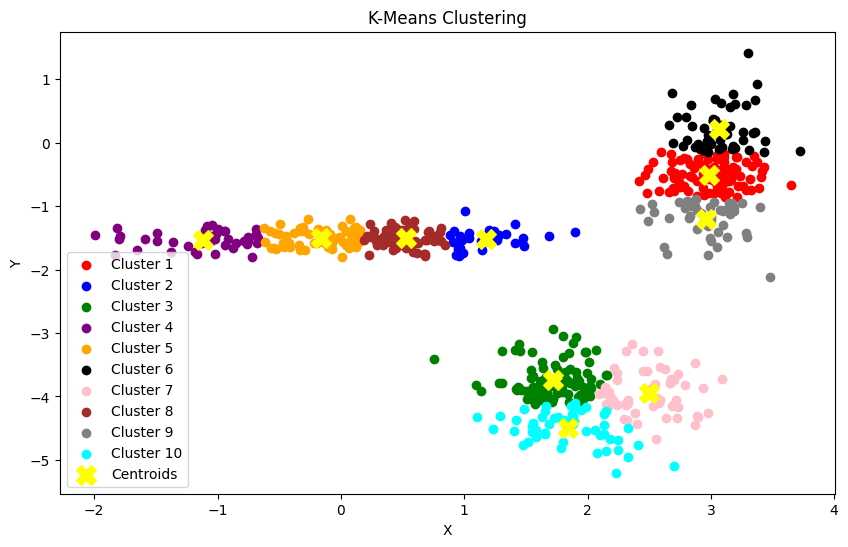

In [17]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])


# Plot the resulting clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black', 'pink', 'brown', 'gray', 'cyan']
for cluster in range(10):
    clustered_data = df[df['cluster'] == cluster]
    plt.scatter(clustered_data['x'], clustered_data['y'], c=colors[cluster], label=f'Cluster {cluster + 1}')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', marker='X', s=200, label='Centroids')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

I don't agree with my colleague's conclusion based solely on the reconstruction error. While it's true that the reconstruction error decreases as the number of clusters increases, this doesn't mean more clusters are any better than ours. 

Firstly, having too many clusters can lead to overfitting as we can clearly see above, where each cluster captures noise rather than meaningful patterns. Secondly, more clusters can make the results harder to interpret. 

A common method to determine the right number of clusters is the elbow method, which looks for a point where adding more clusters doesn't significantly reduce the error. This helps balance error reduction with simplicity. 

Additionally, domain knowledge is crucial. For example, if the data represents customer segments, having too many segments might not be practical for business strategies. 

Therefore, while the error is lower with 10 clusters, it doesn't necessarily mean it's the best choice. Other factors should be considered to determine the optimal number of clusters.